In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [57]:
carprice_data = pd.read_csv('CarPrices/CarPrice_Assignment.csv')
carprice_data.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
192,193,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845.0
122,123,1,plymouth fury gran sedan,gas,std,four,sedan,fwd,front,93.7,...,98,2bbl,2.97,3.23,9.4,68,5500,31,38,7609.0
45,46,0,isuzu D-Max V-Cross,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
102,103,0,nissan fuga,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399.0
39,40,0,honda prelude,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845.0


In [58]:
#clean data, use one hot encoding for category data
carprice_data.drop(['car_ID','CarName'], 'columns', inplace=True)
carprice_data = pd.get_dummies(carprice_data, columns=['aspiration'])
carprice_data = pd.get_dummies(carprice_data, columns=['carbody'])
carprice_data = pd.get_dummies(carprice_data, columns=['fueltype'])
carprice_data = pd.get_dummies(carprice_data, columns=['drivewheel'])
carprice_data = pd.get_dummies(carprice_data, columns=['enginelocation'])
carprice_data = pd.get_dummies(carprice_data, columns=['enginetype'])
carprice_data = pd.get_dummies(carprice_data, columns=['cylindernumber'])
carprice_data = pd.get_dummies(carprice_data, columns=['fuelsystem'])
carprice_data = pd.get_dummies(carprice_data, columns=['doornumber'])
carprice_data.drop(['cylindernumber_twelve', 'aspiration_std', 'fueltype_diesel',  
    'fuelsystem_spdi', 'doornumber_four', 'drivewheel_rwd', 'enginelocation_front' , 'carbody_sedan'], 'columns', inplace=True)
carprice_data.dropna()
carprice_data.to_csv('CarPrices/CarPriceClean.csv')
carprice_data.sample(5)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spfi,doornumber_two
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,1
134,3,99.1,186.6,66.5,56.1,2707,121,2.54,2.07,9.3,...,0,0,0,0,0,0,0,1,0,1
123,-1,103.3,174.6,64.6,59.8,2535,122,3.35,3.46,8.5,...,0,0,0,1,0,0,0,0,0,0
144,0,97.0,172.0,65.4,54.3,2385,108,3.62,2.64,9.0,...,0,0,0,1,0,0,0,0,0,0
113,0,114.2,198.9,68.4,56.7,3285,120,3.46,2.19,8.4,...,0,0,0,0,0,0,0,1,0,0


In [75]:
#train 
X = carprice_data.drop('price', axis=1)
Y = carprice_data['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
#linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
linear_model = Ridge(alpha=0.5, normalize=True)
linear_model.fit(x_train, y_train)

print("Training Score: ", linear_model.score(x_train, y_train), '\n')
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print (coef)

Training Score:  0.8968112286378215 

cylindernumber_four    -2249.102440
carbody_wagon          -1422.538161
drivewheel_fwd         -1379.778240
enginetype_ohcv        -1256.422116
enginetype_l           -1096.127303
drivewheel_4wd         -1073.985166
enginetype_dohcv       -1067.885855
fuelsystem_mfi          -892.525101
enginetype_dohc         -771.463361
fuelsystem_4bbl         -708.705505
stroke                  -668.483395
fueltype_gas            -667.887795
carbody_hatchback       -664.236806
fuelsystem_2bbl         -182.664795
aspiration_turbo        -146.274799
citympg                  -68.730743
highwaympg               -57.366670
enginetype_rotor         -36.884787
cylindernumber_two       -36.884787
carheight                 -7.302324
fuelsystem_spfi            0.000000
peakrpm                    0.508857
curbweight                 1.670779
horsepower                23.303007
enginesize                31.989034
carlength                 37.791792
compressionratio          

In [77]:
y_pred = linear_model.predict(x_test)
df_pred_actual = pd.DataFrame({'predicted' : y_pred, 'actual' : y_test})

print ("Testing_score: " , r2_score(y_test, y_pred))

Testing_score:  0.8721856204522455


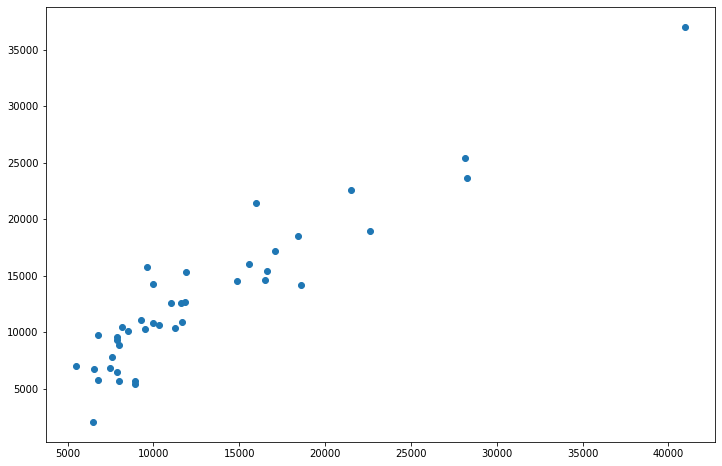

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.show()

Text(0, 0.5, 'Price')

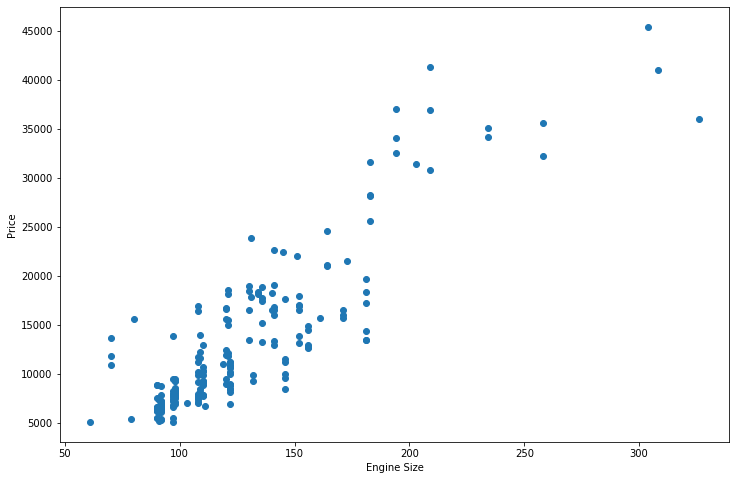

In [80]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(carprice_data['enginesize'], carprice_data['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

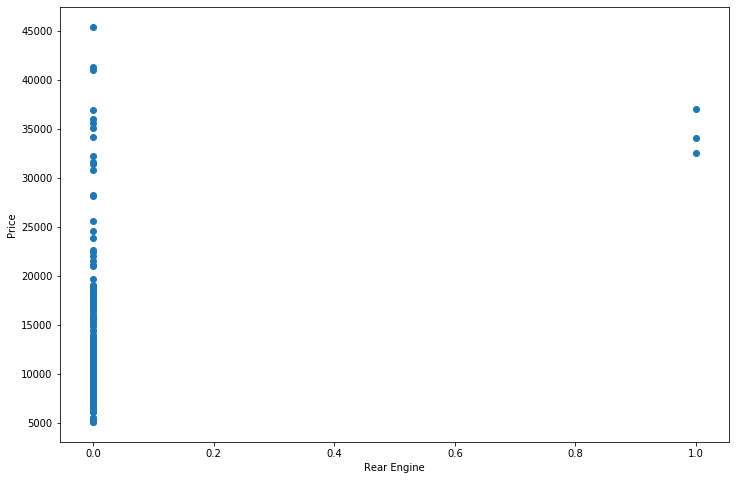

In [83]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(carprice_data['enginelocation_rear'], carprice_data['price'])
plt.xlabel('Rear Engine')
plt.ylabel('Price')